In [6]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sqlalchemy import create_engine
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
DB_URI = "sqlite:///C:/Users/User/Desktop/MBD/Term2/PythonII/Group_Assignment/data/processed/database_energy.db"

engine = create_engine(DB_URI)

energy_df = pd.read_sql_table("final_data", engine)

#energy_df.set_index('date', inplace=True)

In [8]:
energy_df.head()

,date,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,...,price(t-3),price(t-4),price(t-5),price(t-6),price(t-7),price(t-8),price(t-9),price(t-10),price(t-11),price(t-12)
0,2015-01-12,-1.360956,-1.246003,-1.425340,-3.834323,0.618409,-0.640074,-0.527120,-0.275725,-0.034384,...,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333,69.443750,62.090833,65.410000
1,2015-01-13,-1.308956,-1.193256,-1.375231,-4.352342,0.603542,-0.565370,0.108218,-0.275725,-0.034384,...,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333,69.443750,62.090833
2,2015-01-14,-1.254054,-1.137566,-1.322327,-4.405563,1.028090,-0.664975,0.468870,-0.275725,-0.034384,...,59.531250,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333,69.443750
3,2015-01-15,-1.050180,-0.930767,-1.125871,-1.294256,1.090864,0.430684,0.280495,0.355224,-0.034384,...,71.372917,59.531250,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333
4,2015-01-16,-1.095299,-0.976534,-1.169348,-0.346128,1.160245,0.704599,0.783970,0.823043,-0.034384,...,69.841250,71.372917,59.531250,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083


In [20]:
energy_df.columns

Index(['date', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'winter', 'spring', 'summer', 'autumn', 'price(t-1)',
       'price(t-2)', 'price(t-3)', 'price(t-4)', 'price(t-5)', 'price(t-6)',
       'price(t-7)', 'price(t-8)', 'price(t-9)', 'price(t-10)', 'price(t-1

In [10]:
target = 'price actual'

y = energy_df[target]
X = energy_df.drop(columns=['price actual','date'])

# scale_X = MinMaxScaler(feature_range=(0, 1))
# scale_y = MinMaxScaler(feature_range=(0, 1))
# scale_X.fit(X[:train_end_idx])
# scale_y.fit(y[:train_end_idx])

In [11]:
X.head()

,date,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,...,price(t-3),price(t-4),price(t-5),price(t-6),price(t-7),price(t-8),price(t-9),price(t-10),price(t-11),price(t-12)
0,2015-01-12,-1.360956,-1.246003,-1.425340,-3.834323,0.618409,-0.640074,-0.527120,-0.275725,-0.034384,...,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333,69.443750,62.090833,65.410000
1,2015-01-13,-1.308956,-1.193256,-1.375231,-4.352342,0.603542,-0.565370,0.108218,-0.275725,-0.034384,...,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333,69.443750,62.090833
2,2015-01-14,-1.254054,-1.137566,-1.322327,-4.405563,1.028090,-0.664975,0.468870,-0.275725,-0.034384,...,59.531250,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333,69.443750
3,2015-01-15,-1.050180,-0.930767,-1.125871,-1.294256,1.090864,0.430684,0.280495,0.355224,-0.034384,...,71.372917,59.531250,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083,65.223333
4,2015-01-16,-1.095299,-0.976534,-1.169348,-0.346128,1.160245,0.704599,0.783970,0.823043,-0.034384,...,69.841250,71.372917,59.531250,68.212083,76.352500,78.559167,79.046250,68.678750,74.598333,58.912083


In [22]:
test_index = energy_df["date"].iloc[-1] - pd.DateOffset(months=6)
X_train, X_test = X.loc[energy_df['date'] < test_index], X.loc[energy_df['date'] >= test_index]
y_train, y_test = y.loc[energy_df['date'] < test_index], y.loc[energy_df['date'] >= test_index]
test_dates = energy_df.loc[energy_df['date'] >= test_index, 'date']


In [23]:
tscv = TimeSeriesSplit(n_splits=5)

# Define the search space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Create an XGBoost model
model_XGB = XGBRegressor()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=model_XGB, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)

# Train the model on the training set
grid_search.fit(X_train, y_train)

# Get the best hyperparameter configuration
best_params = grid_search.best_params_

# Print the best configuration
print("Best parameters:", best_params)

# Get the best validation score
best_score = grid_search.best_score_

# Print the best score
print("Best score:", best_score)

Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
Best score: -37.6305985156936


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate RMSE, MAPE, MAE and MSE for train and test sets
train_rmse = mean_squared_error(y_train, best_model.predict(X_train), squared=False)
train_mae = mean_absolute_error(y_train, best_model.predict(X_train))
train_mse = mean_squared_error(y_train, best_model.predict(X_train))

test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)

# Print the results
print("-" * 50)
print("Train Results:")
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("MSE:", train_mse)

print("-" * 50)
print("Test Results:")
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("MSE:", test_mse)

# Feature importance (if the model supports it)
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_

    # Print the feature importances
    print("-" * 50)
    print("Feature importances:")
    for i, importance in enumerate(feature_importances):
        print(f"{i+1}. {X_train.columns[i]}: {importance}")
else:
    print("The selected model does not support feature importances.")


--------------------------------------------------
Train Results:
RMSE: 2.8234798636935596
MAE: 2.081989963134336
MSE: 7.972038540683003
--------------------------------------------------
Test Results:
RMSE: 2.952130354549855
MAE: 2.229787853679675
MSE: 8.715073630254654
--------------------------------------------------
Feature importances:
1. temp: 0.00543562276288867
2. temp_min: 0.0075058783404529095
3. temp_max: 0.011994236148893833
4. pressure: 0.004981081001460552
5. humidity: 0.005385582335293293
6. wind_speed: 0.020126711577177048
7. wind_deg: 0.00679252203553915
8. rain_1h: 0.006935289595276117
9. rain_3h: 0.0036692002322524786
10. snow_3h: 0.0
11. clouds_all: 0.006343295332044363
12. weather_id: 0.005540762096643448
13. generation biomass: 0.004858565516769886
14. generation fossil brown coal/lignite: 0.0035689387004822493
15. generation fossil gas: 0.03192488104104996
16. generation fossil hard coal: 0.024041883647441864
17. generation fossil oil: 0.01104837004095316
18. ge

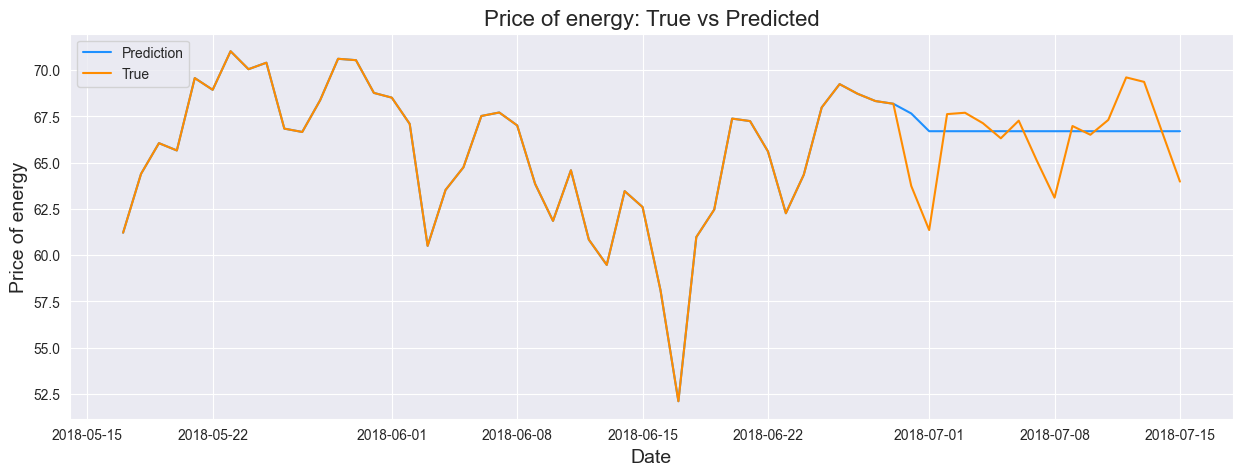

In [39]:
import numpy as np

def predict_next_price_energy(X, model, n_periods):
    X_pred = X.copy()
    y_pred = np.zeros(n_periods)
    
    lag_columns = ['price(t-' + str(i) + ')' for i in range(1, 13)]
    
    for i in range(n_periods):
        X_pred = pd.concat([X_pred, X_pred.iloc[-1:, :]], axis=0, ignore_index=True)
        y_pred[i] = model.predict(X_pred.iloc[-1:])
        for j in range(1, 13):
            lag_column = f'price(t-{j})'
            X_pred[lag_column].iloc[-1] = X_pred[lag_column].iloc[-2]
        X_pred[lag_columns[0]].iloc[-1] = y_pred[i]
        
    return X_pred, y_pred

X_pred, y_pred = predict_next_price_energy(X_train, grid_search.best_estimator_, n_periods=12)

# Concatenate the predictions to the original dataframe
y_pred = pd.concat([y_train, pd.Series(y_pred)], axis=0)
y_true = pd.concat([y_train, y_test.iloc[0:16]], axis=0)
time = pd.concat([energy_df.loc[energy_df['date'] < test_index, 'date'], test_dates.iloc[0:16]], axis=0)

last_60_idx = -60
y_pred_last_60 = y_pred.iloc[last_60_idx:]
y_true_last_60 = y_true.iloc[last_60_idx:]
time_last_60 = time.iloc[last_60_idx:]


fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(time_last_60, y_pred_last_60, label='Prediction', color='dodgerblue')
ax.plot(time_last_60, y_true_last_60, label='True', color='darkorange')
ax.set_title('Price of energy: True vs Predicted', fontsize=16)
ax.set_ylabel('Price of energy', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.legend()
plt.show()